In [ ]:
#Question 2c

In [1]:
import pandas as pd
import os
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import numpy as np

In [2]:
path = r"C:\Users\ASUS UX534F\Desktop\SIM\y2\ST2195\Coursework\Datasets"

In [3]:
df = []
years = range(1995, 2005)

In [4]:
for year in years: 
    filename = f"{year}.csv" 
    file_path = os.path.join(os.getcwd(), path, filename) 
     
    print(file_path) 
     
    if os.path.isfile(file_path): 
        df.append(pd.read_csv(file_path, nrows=2000000, encoding='latin-1', low_memory = True)) 
df = pd.concat(df, ignore_index=True)

C:\Users\ASUS UX534F\Desktop\SIM\y2\ST2195\Coursework\Datasets\1995.csv
C:\Users\ASUS UX534F\Desktop\SIM\y2\ST2195\Coursework\Datasets\1996.csv
C:\Users\ASUS UX534F\Desktop\SIM\y2\ST2195\Coursework\Datasets\1997.csv
C:\Users\ASUS UX534F\Desktop\SIM\y2\ST2195\Coursework\Datasets\1998.csv
C:\Users\ASUS UX534F\Desktop\SIM\y2\ST2195\Coursework\Datasets\1999.csv
C:\Users\ASUS UX534F\Desktop\SIM\y2\ST2195\Coursework\Datasets\2000.csv
C:\Users\ASUS UX534F\Desktop\SIM\y2\ST2195\Coursework\Datasets\2001.csv
C:\Users\ASUS UX534F\Desktop\SIM\y2\ST2195\Coursework\Datasets\2002.csv
C:\Users\ASUS UX534F\Desktop\SIM\y2\ST2195\Coursework\Datasets\2003.csv
C:\Users\ASUS UX534F\Desktop\SIM\y2\ST2195\Coursework\Datasets\2004.csv


In [5]:
airport_df = pd.read_csv(r"C:\Users\ASUS UX534F\Desktop\SIM\y2\ST2195\Coursework\Datasets\airports.csv")
carriers_df = pd.read_csv(r"C:\Users\ASUS UX534F\Desktop\SIM\y2\ST2195\Coursework\Datasets\carriers.csv")

In [6]:
print(df.columns.tolist())
print(airport_df.columns.tolist())
print(carriers_df.columns.tolist())

['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut', 'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
['iata', 'airport', 'city', 'state', 'country', 'lat', 'long']
['Code', 'Description']


In [6]:
df = df.merge(airport_df[['iata', 'lat', 'long']], left_on='Origin', right_on='iata', how='left')
df.rename(columns={'lat': 'lat_origin', 'long': 'long_origin'}, inplace=True)
df.drop('iata', axis=1, inplace=True)

In [7]:
df = df.merge(airport_df[['iata', 'lat', 'long']], left_on='Dest', right_on='iata', how='left')
df.rename(columns={'lat': 'lat_dest', 'long': 'long_dest'}, inplace=True)
df.drop('iata', axis=1, inplace=True)

In [8]:
features = ['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime', 'Distance', 
            'lat_origin', 'long_origin', 'lat_dest', 'long_dest', 'UniqueCarrier', 'Year']
target = 'Diverted'

In [9]:
num_features = ['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime', 'Distance', 
                    'lat_origin', 'long_origin', 'lat_dest', 'long_dest']
cat_features = ['UniqueCarrier']

In [10]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_features),
        ('cat', categorical_transformer, cat_features)
    ])

In [11]:
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression(max_iter=1000))])

In [12]:
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

C:\Users\ASUS UX534F\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ASUS UX534F\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

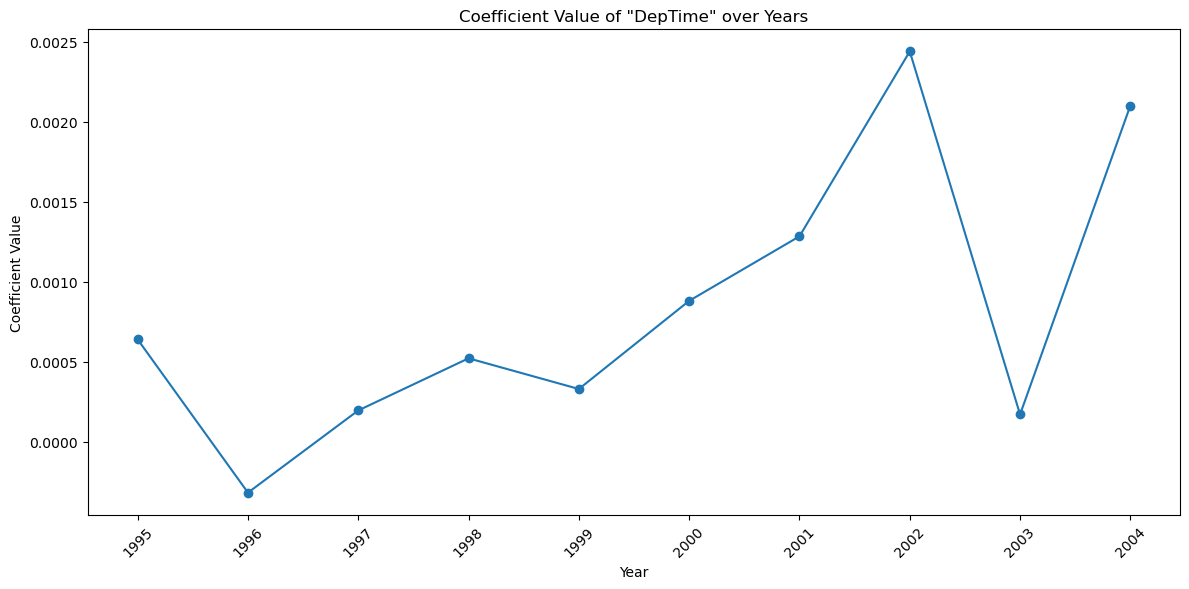

C:\Users\ASUS UX534F\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ASUS UX534F\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

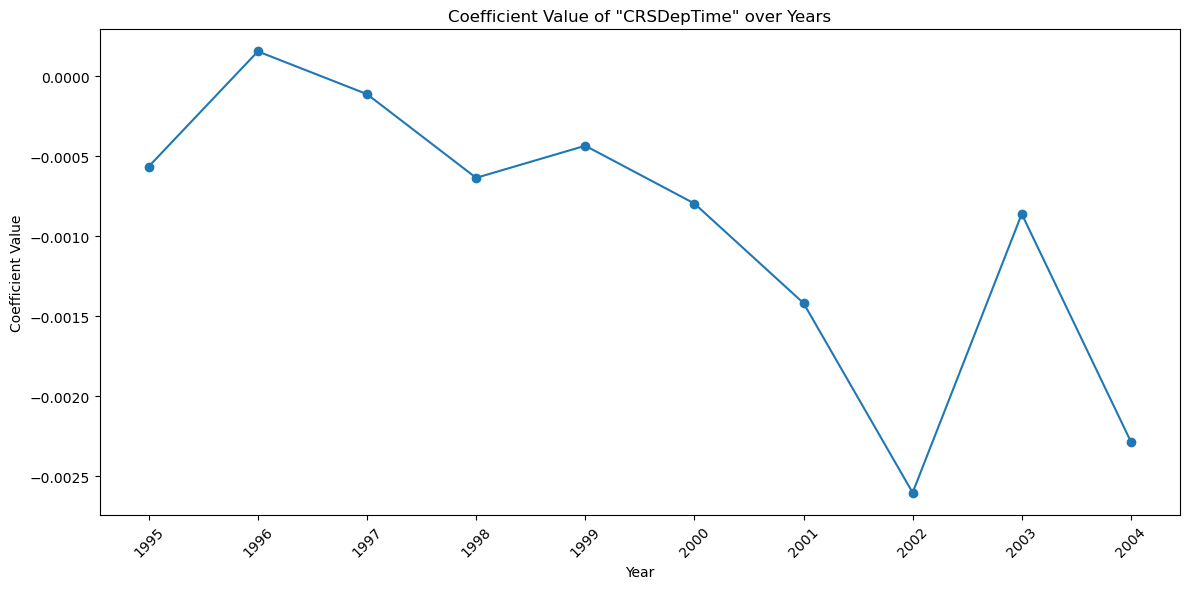

C:\Users\ASUS UX534F\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ASUS UX534F\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

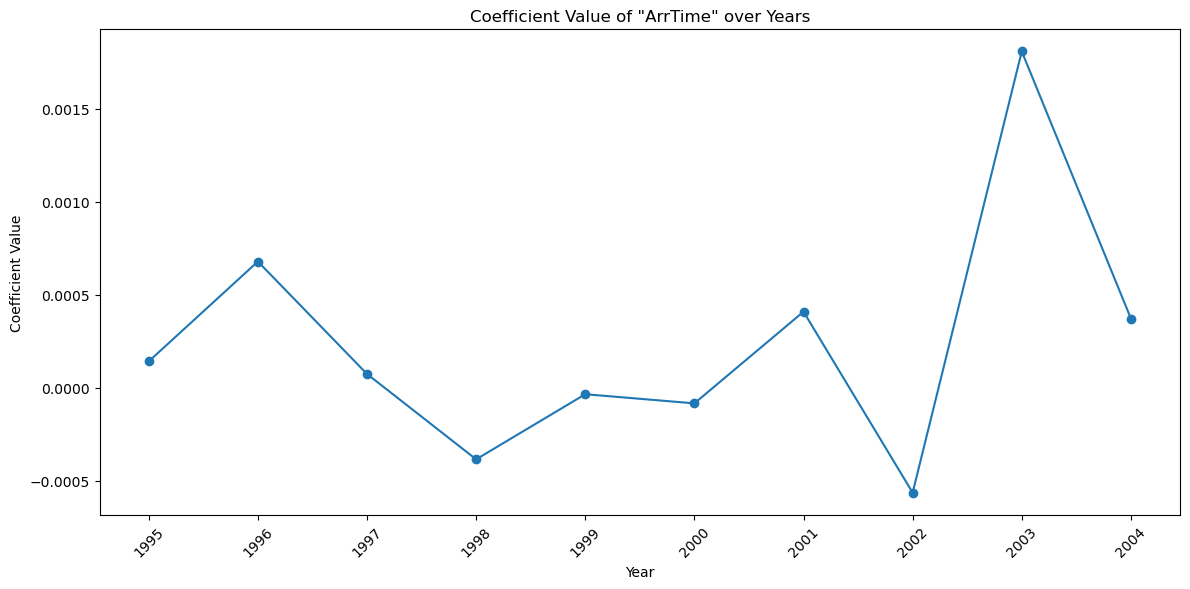

C:\Users\ASUS UX534F\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ASUS UX534F\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

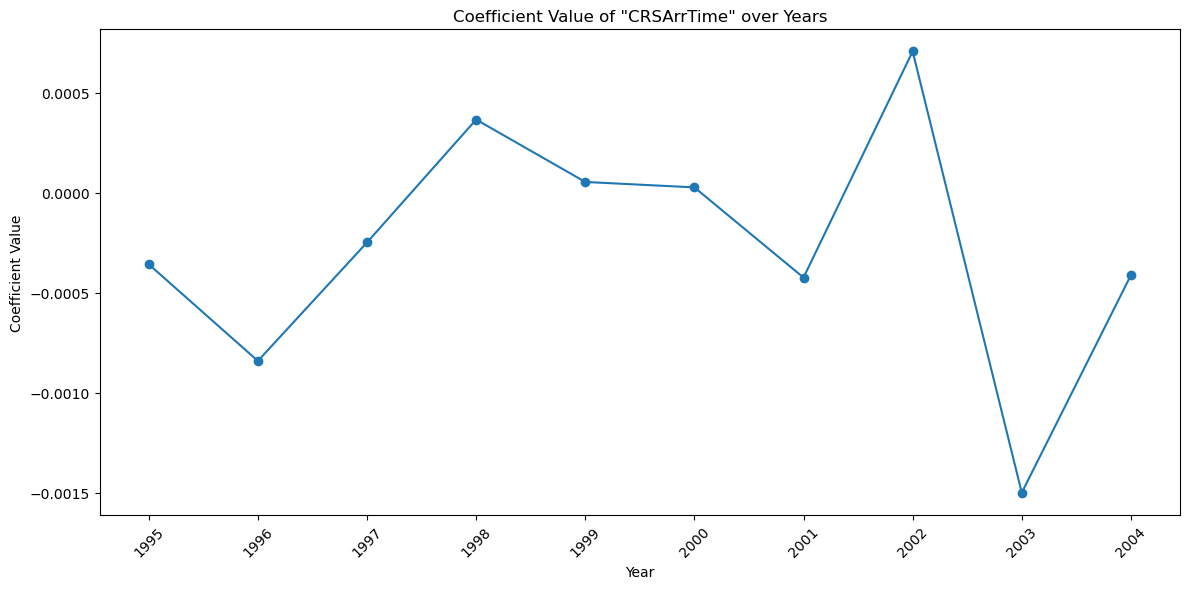

C:\Users\ASUS UX534F\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ASUS UX534F\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

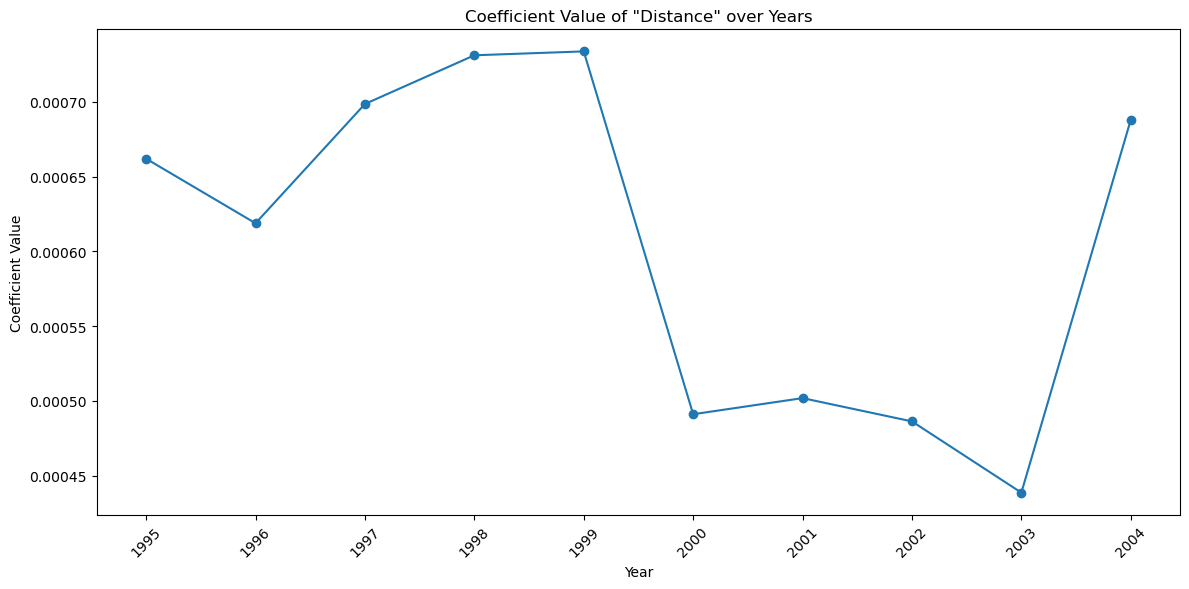

C:\Users\ASUS UX534F\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ASUS UX534F\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

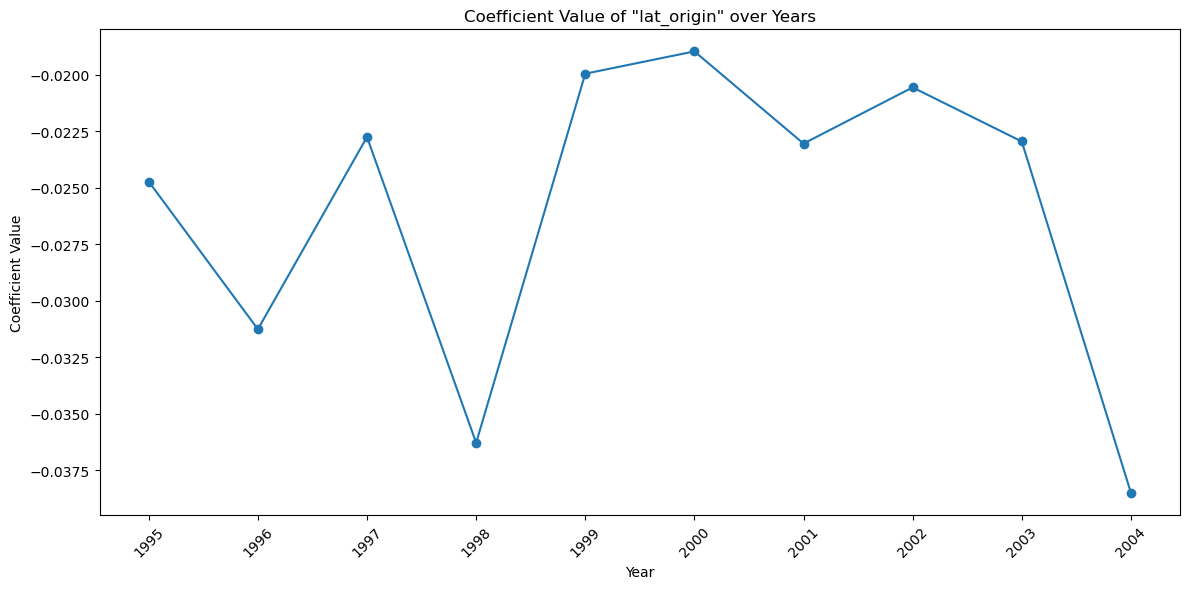

C:\Users\ASUS UX534F\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ASUS UX534F\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

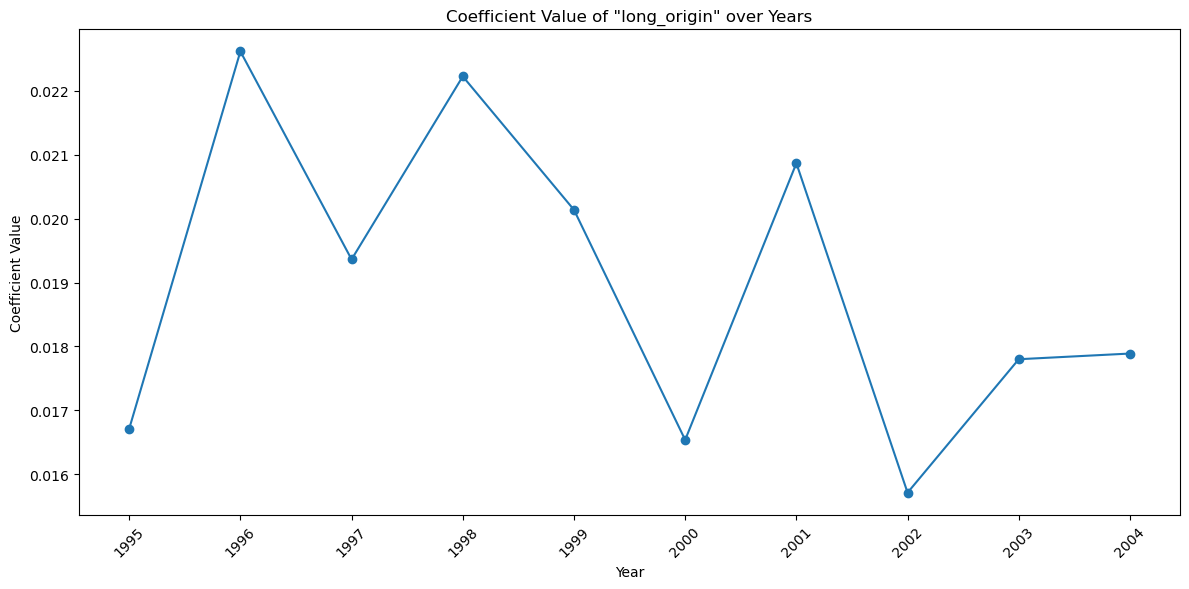

C:\Users\ASUS UX534F\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ASUS UX534F\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

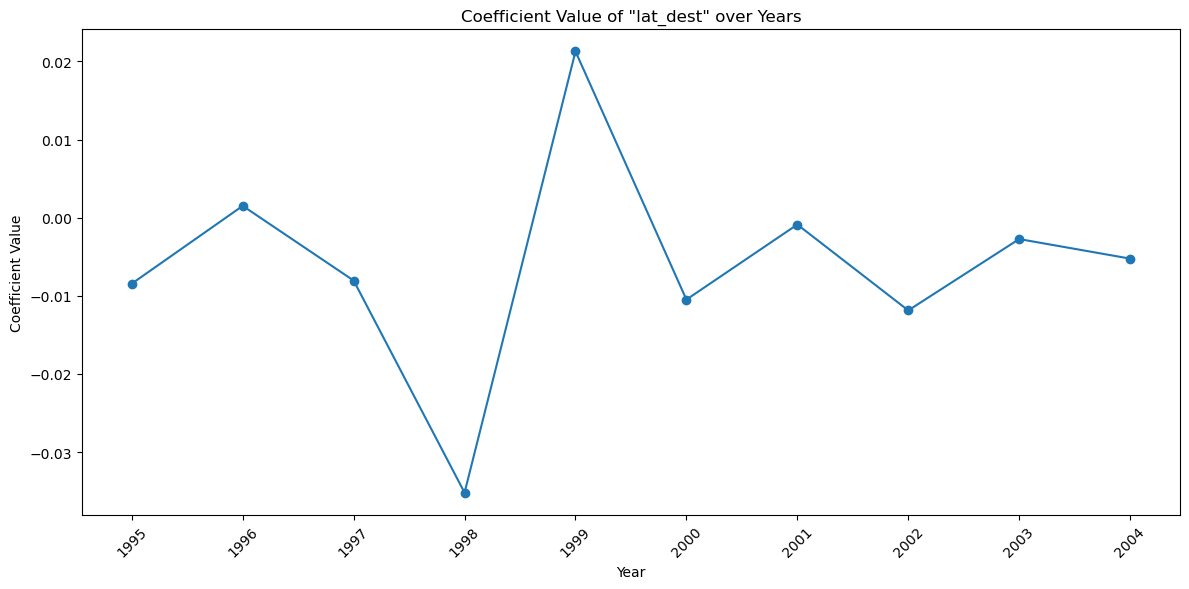

C:\Users\ASUS UX534F\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ASUS UX534F\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

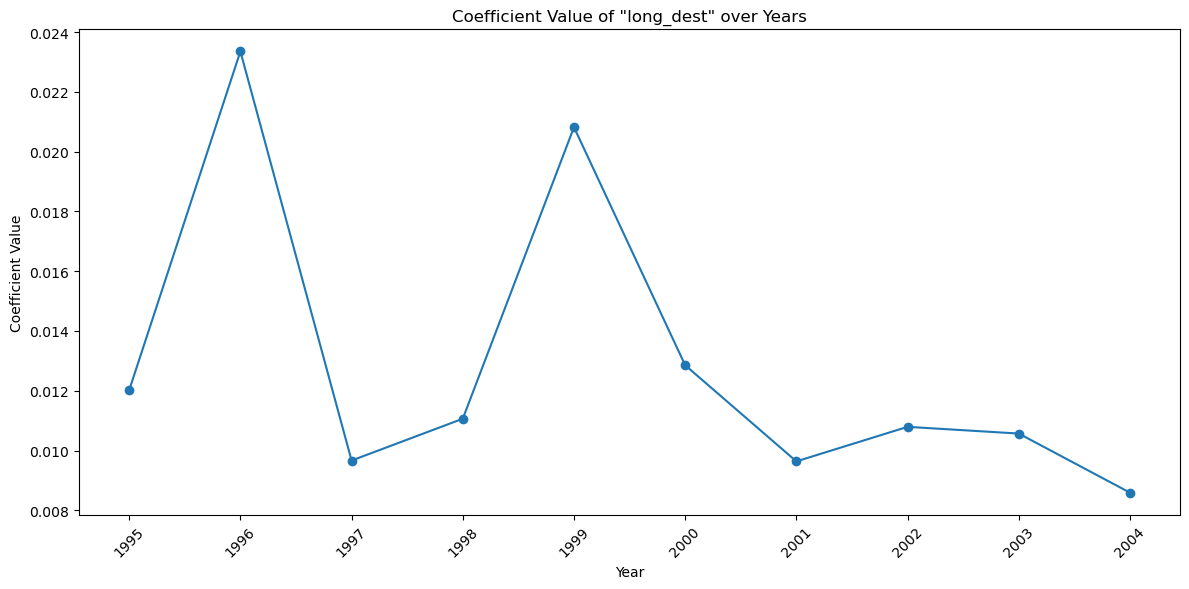

C:\Users\ASUS UX534F\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ASUS UX534F\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

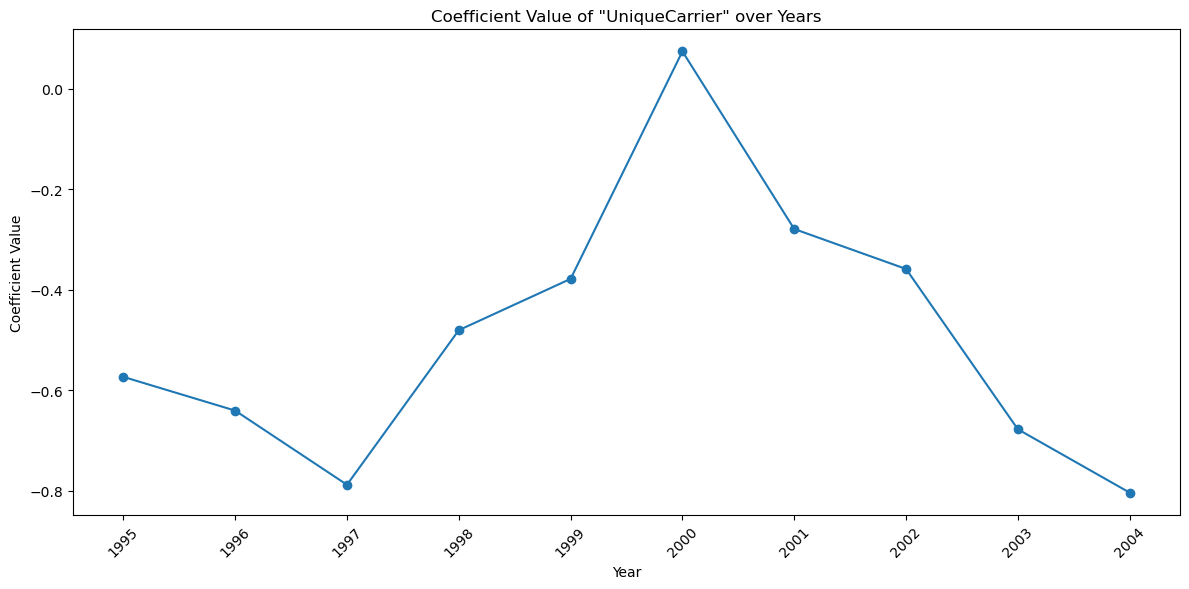

C:\Users\ASUS UX534F\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ASUS UX534F\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

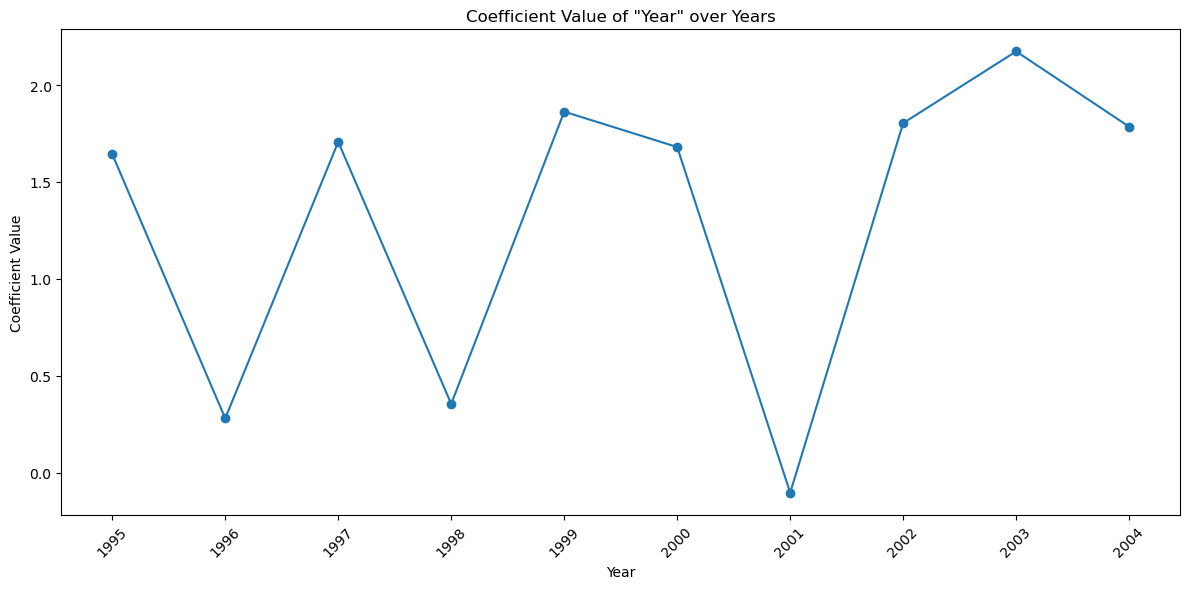

In [14]:
for feature in features:
    plt.figure(figsize=(12, 6))
    plt.xlabel('Year')
    plt.ylabel('Coefficient Value')
    plt.title(f'Coefficient Value of "{feature}" over Years')

    coef_values = [] 

    for year in years:
        X_train_year = X_train[X_train['Year'].astype(int) == year]
        y_train_year = y_train[X_train['Year'].astype(int) == year]

        clf.fit(X_train_year, y_train_year)

        feature_index = features.index(feature)
        coef_value = clf.named_steps['classifier'].coef_[0][feature_index]

        coef_values.append(coef_value)

    plt.plot(years, coef_values, marker='o', label=feature, linestyle='-')
    plt.xticks(list(map(int, years)), rotation=45)
    plt.tight_layout()

    plt.show()

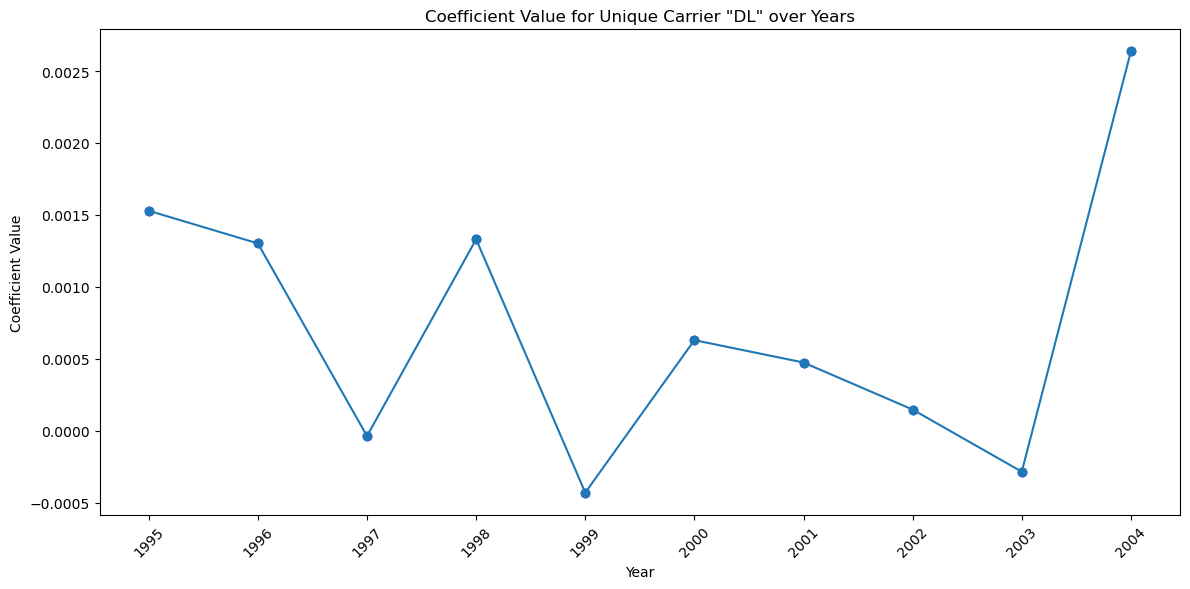

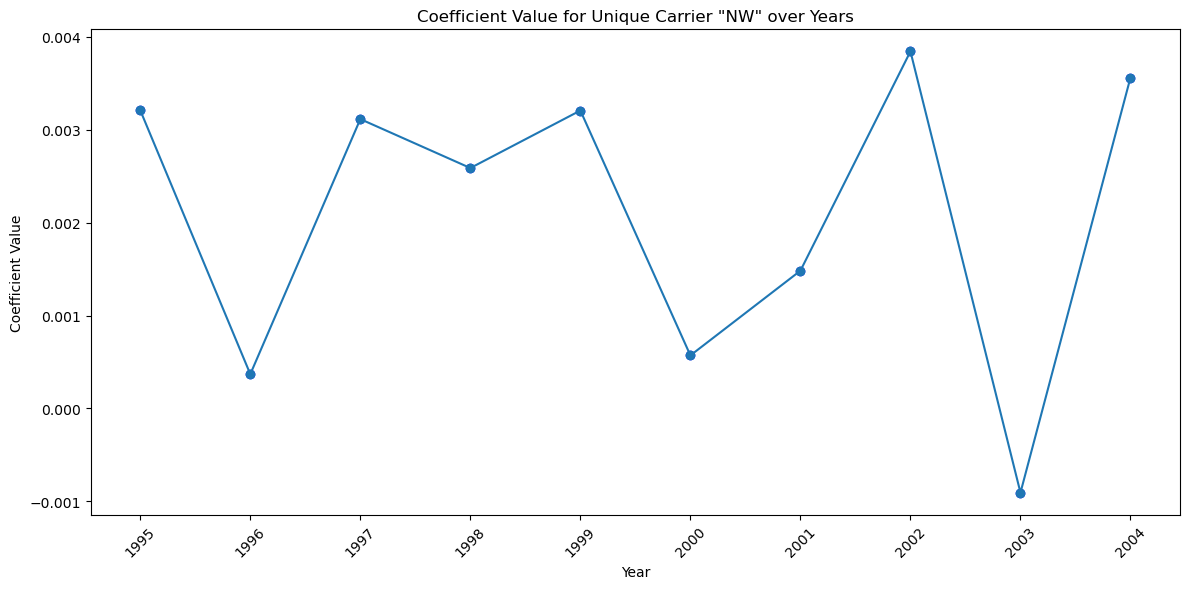

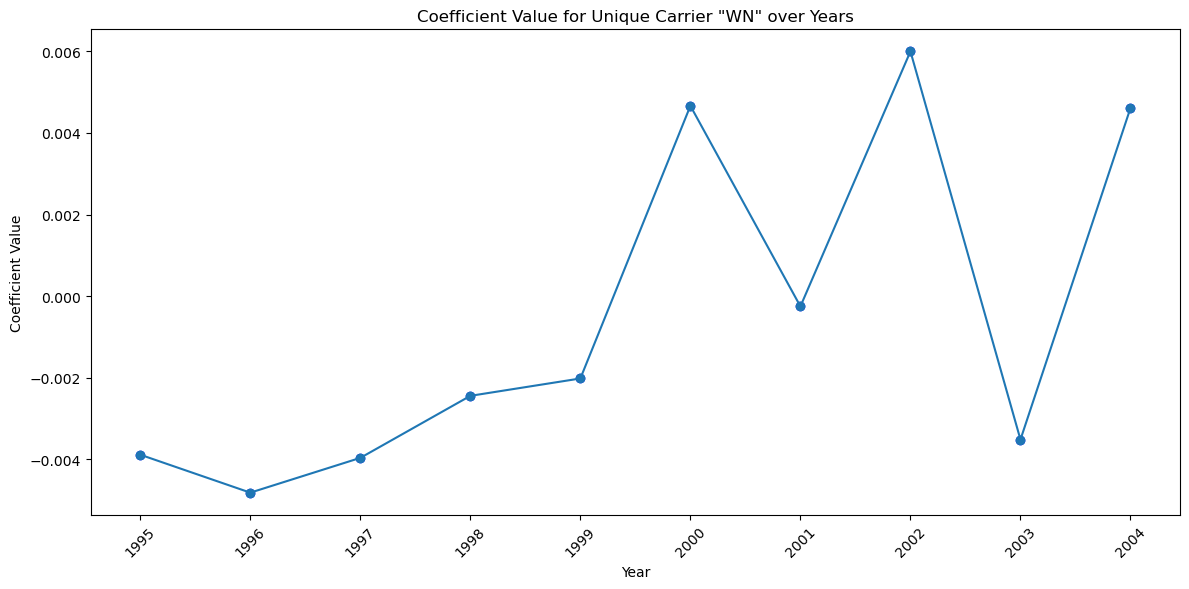

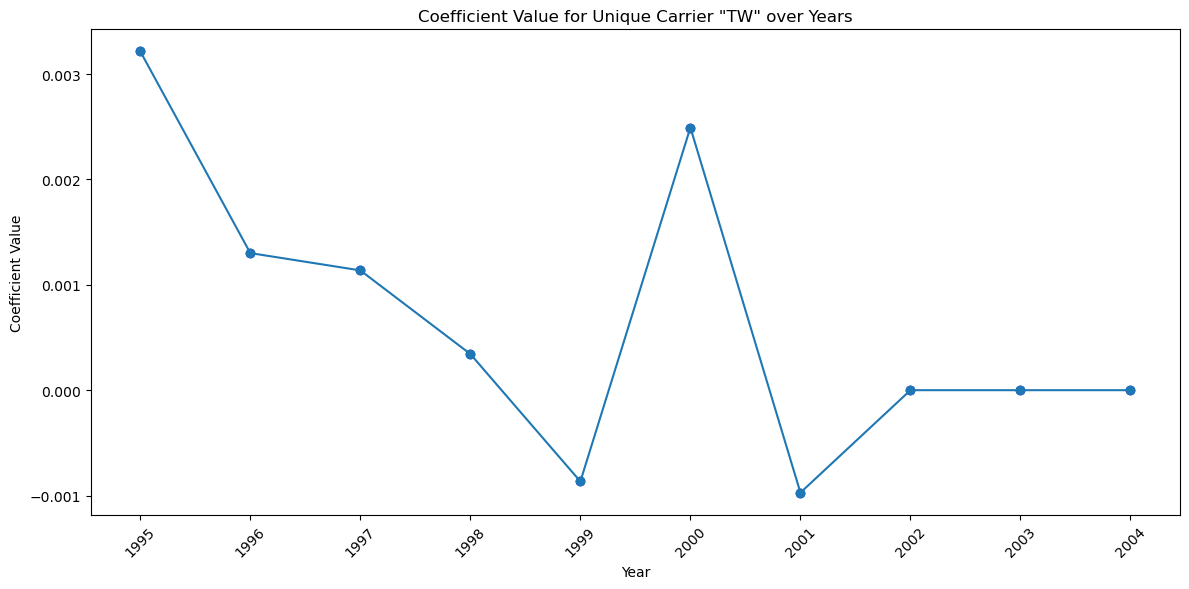

C:\Users\ASUS UX534F\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


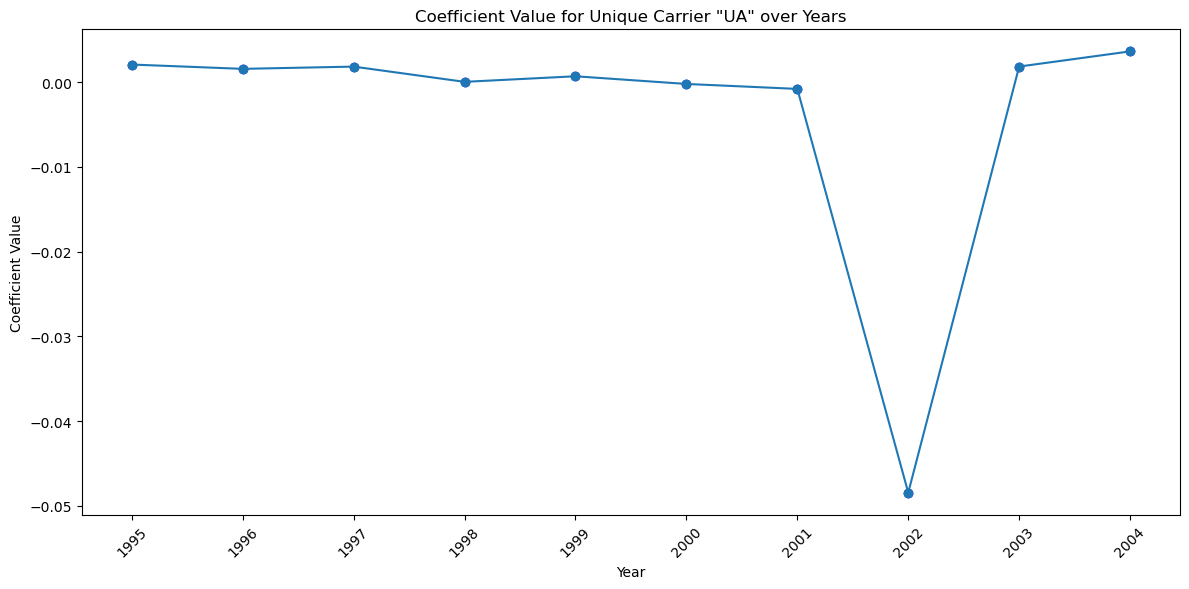

C:\Users\ASUS UX534F\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


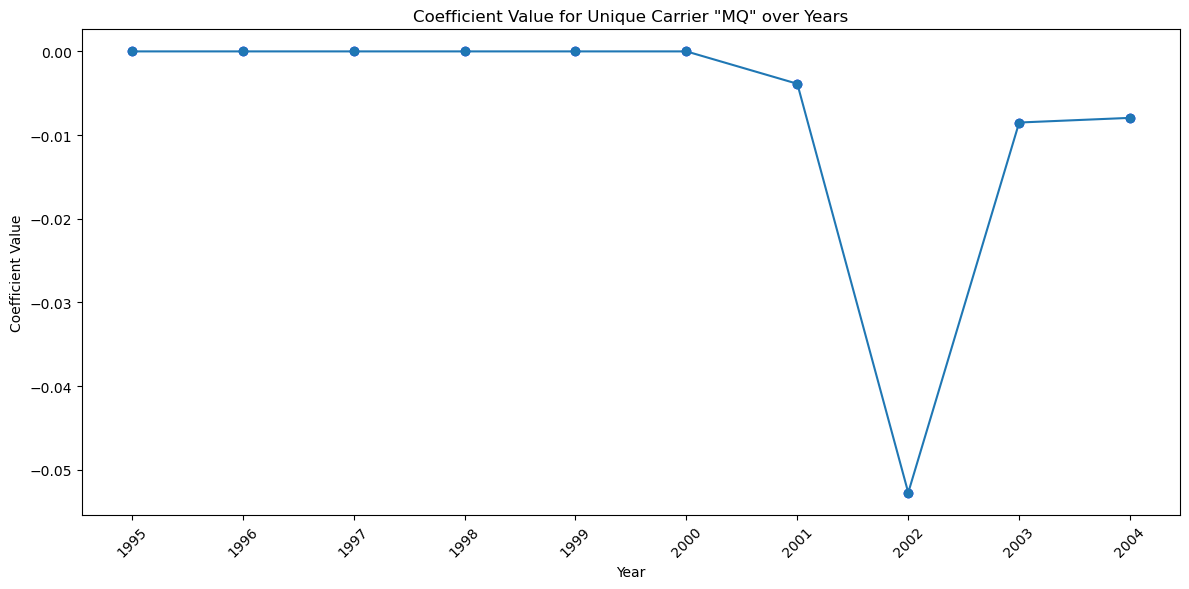

C:\Users\ASUS UX534F\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


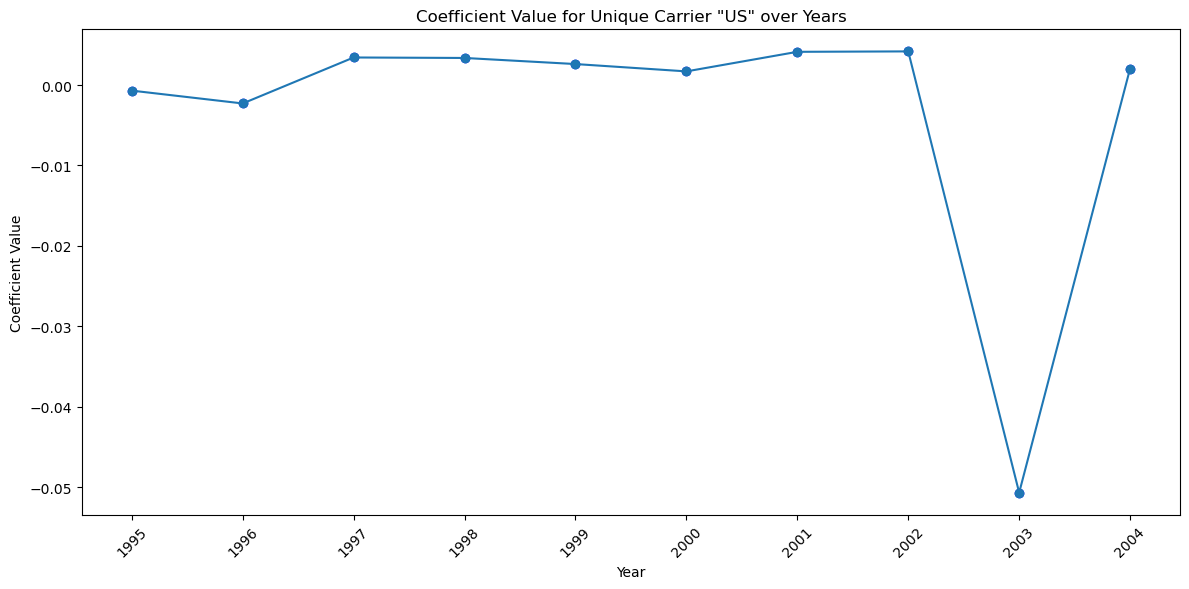

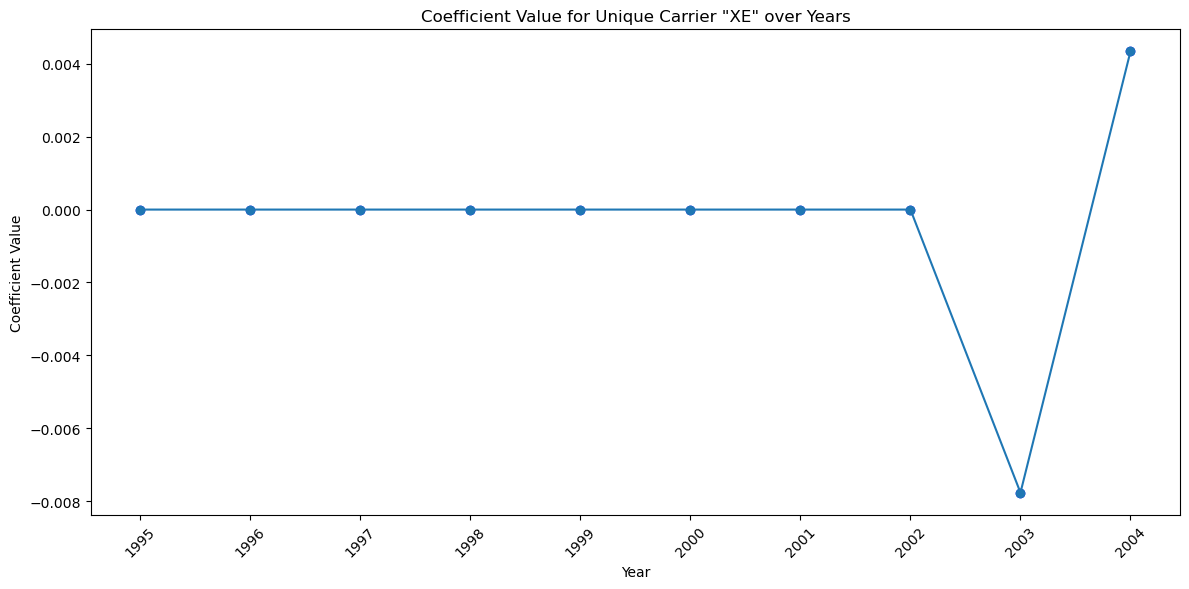

C:\Users\ASUS UX534F\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


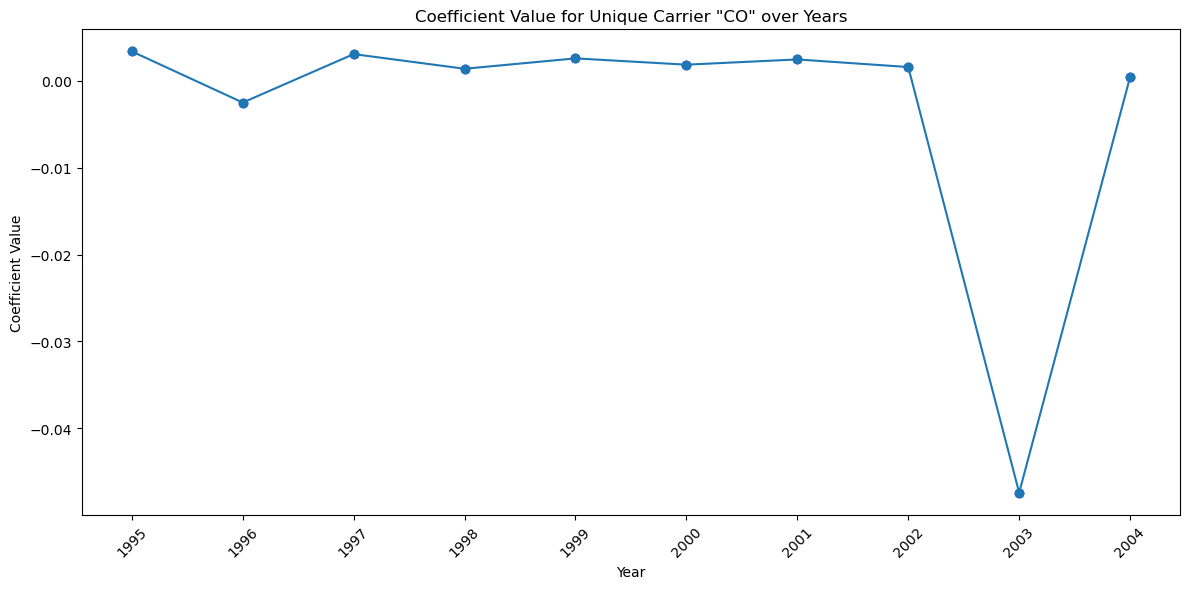

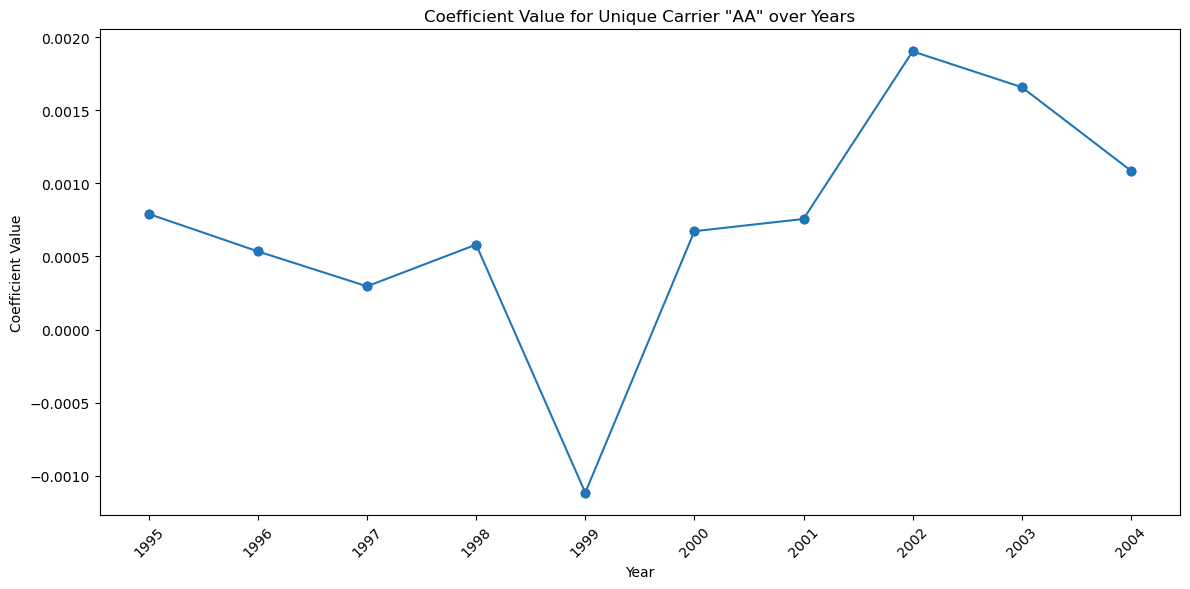

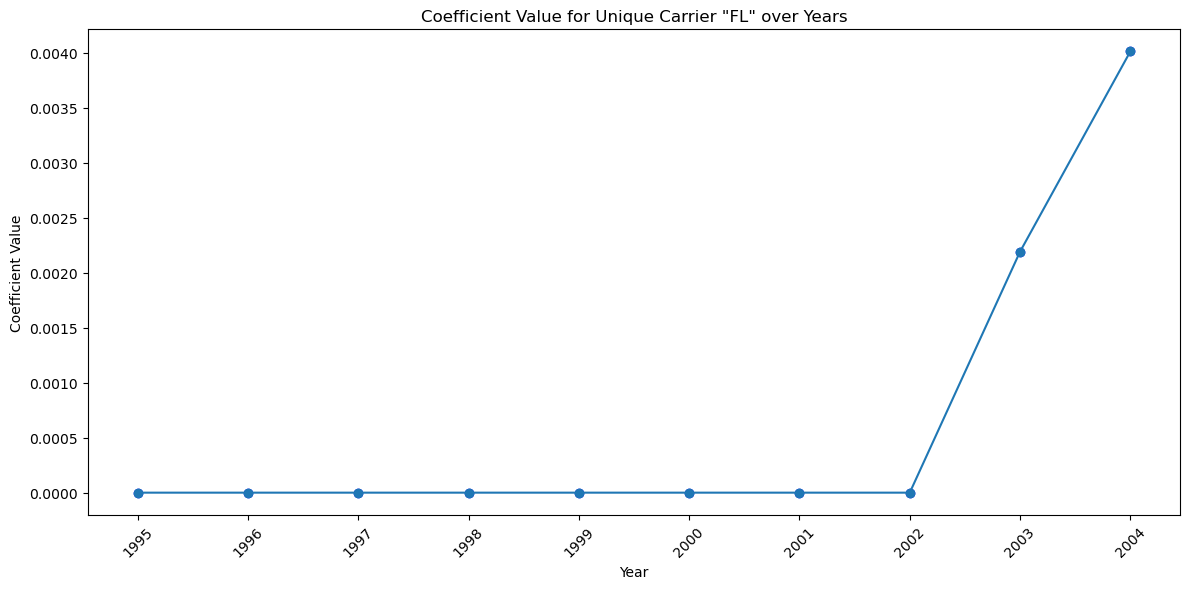

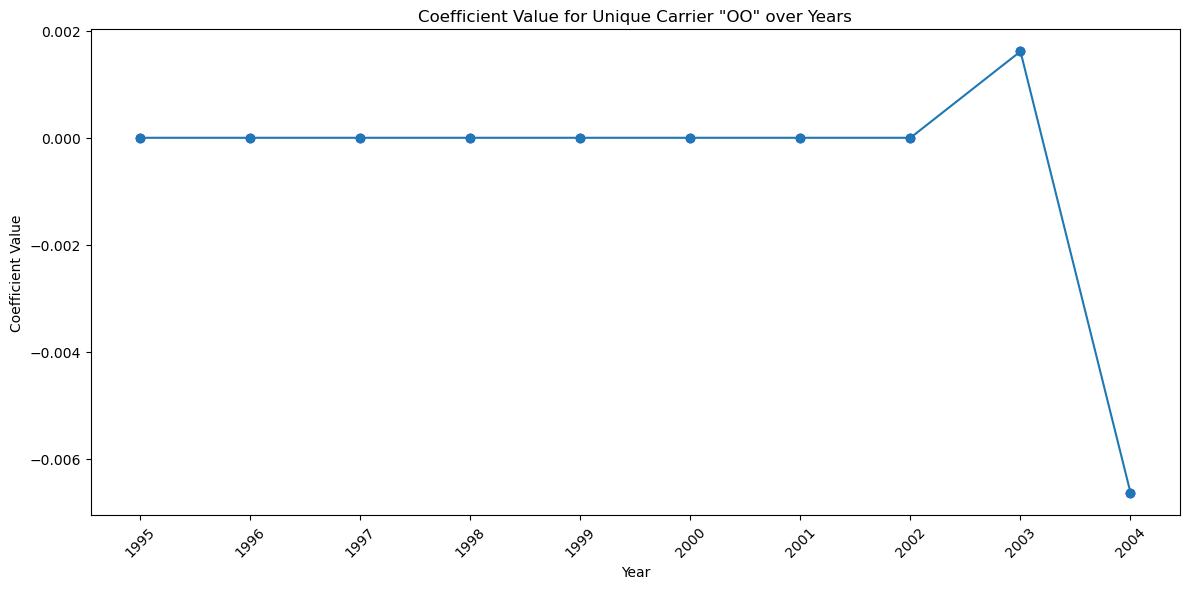

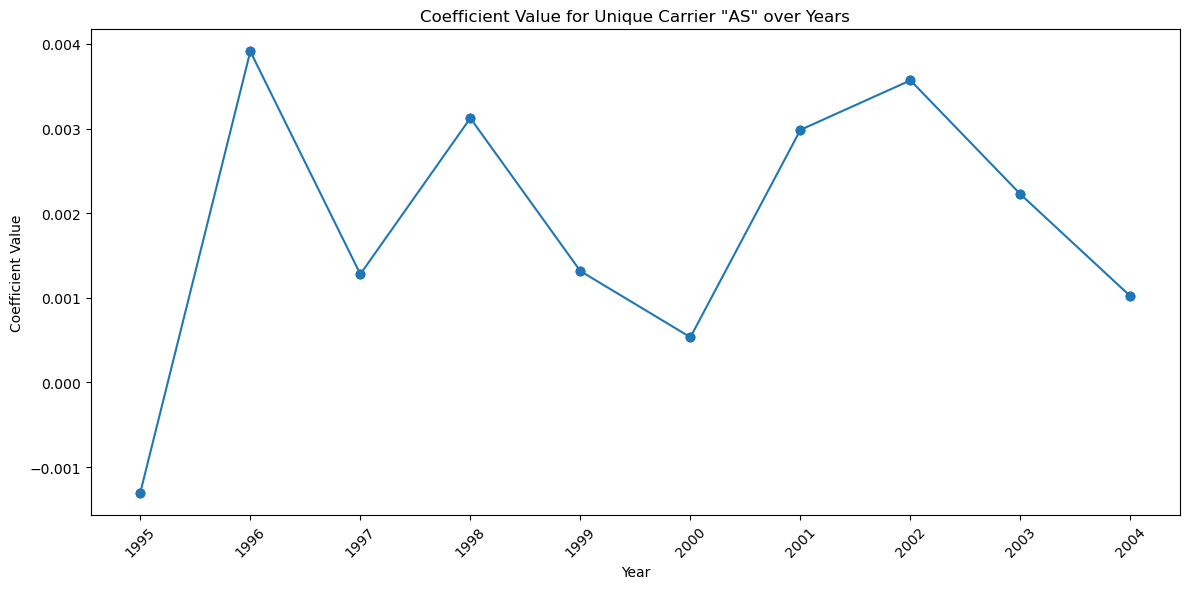

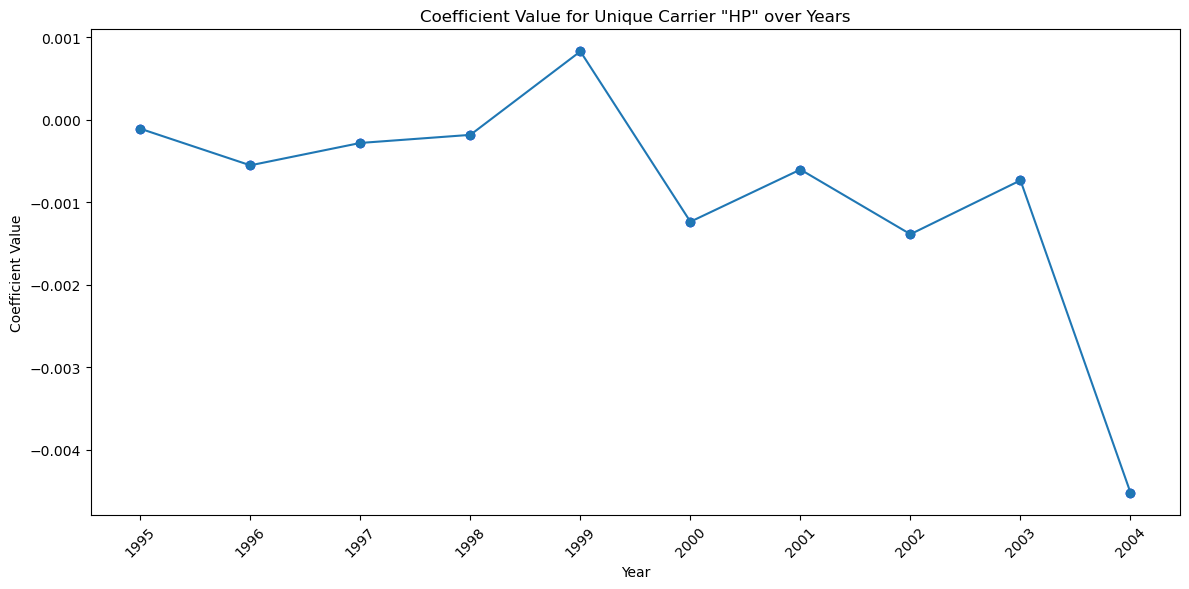

C:\Users\ASUS UX534F\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


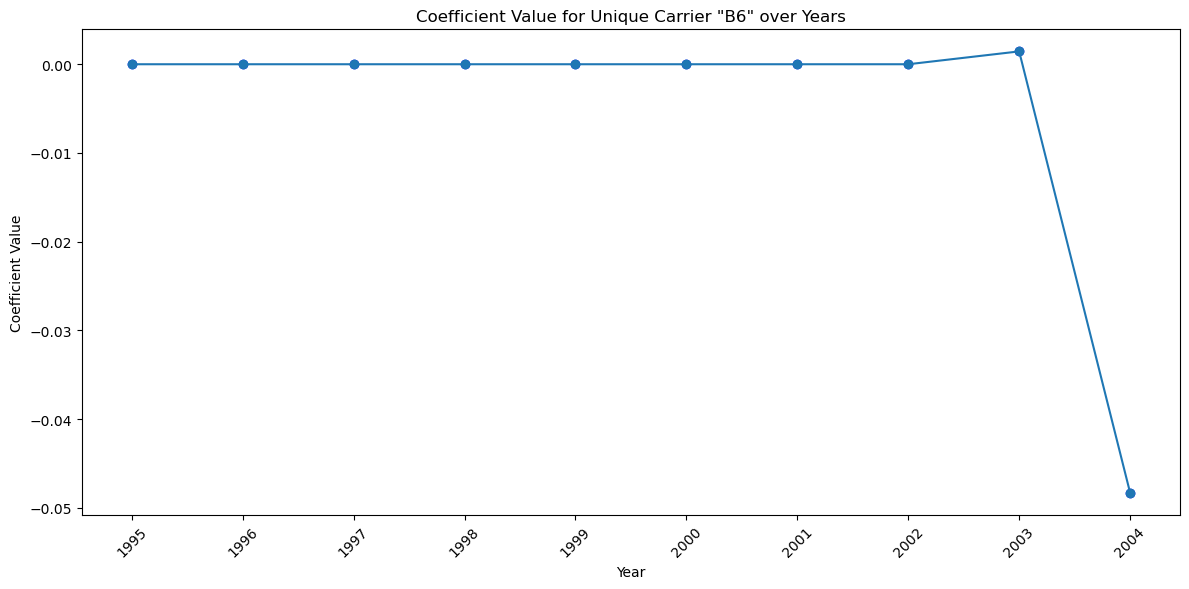

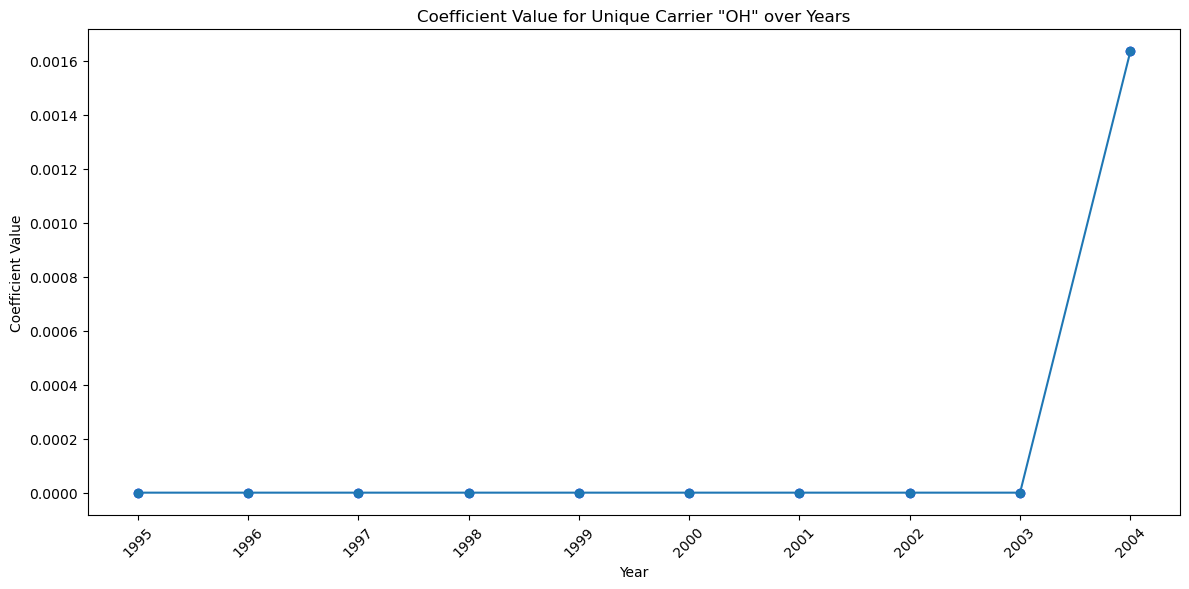

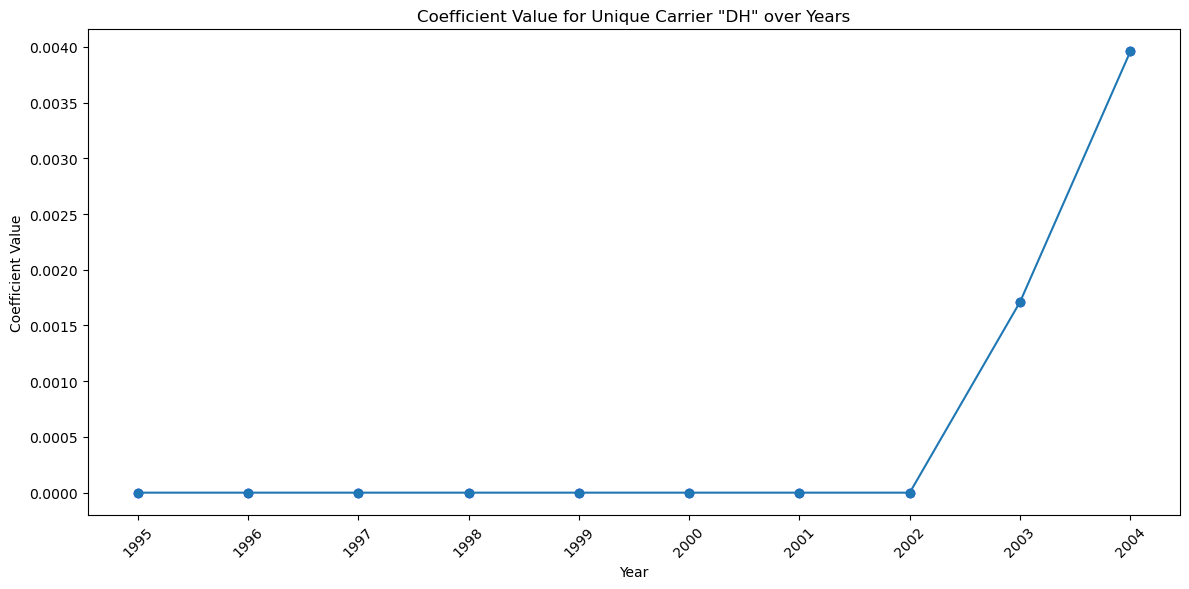

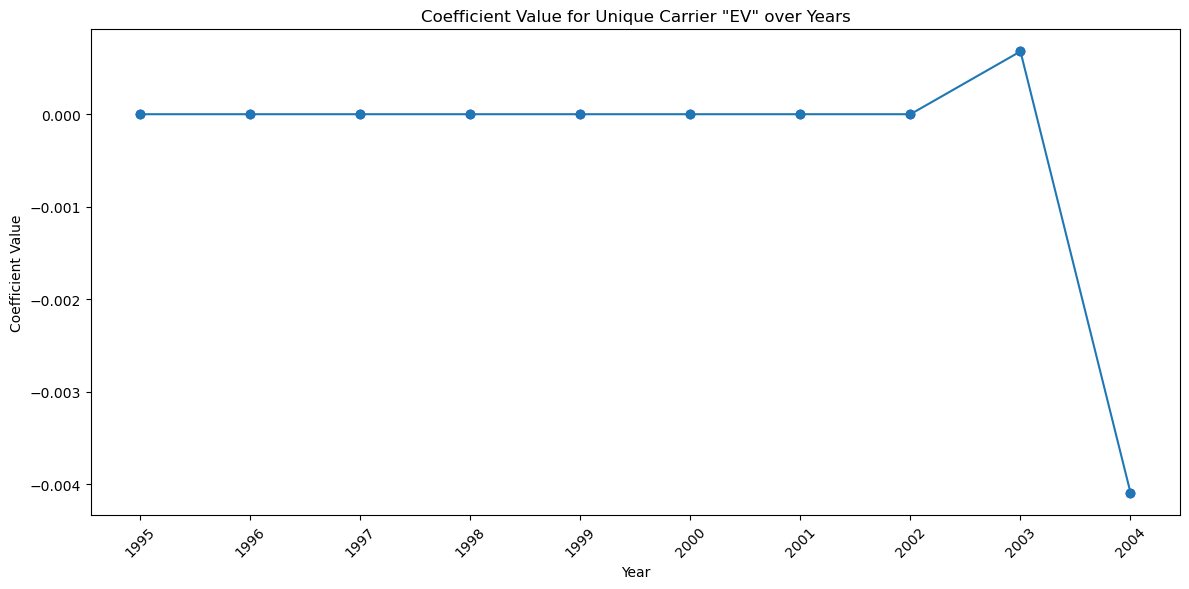

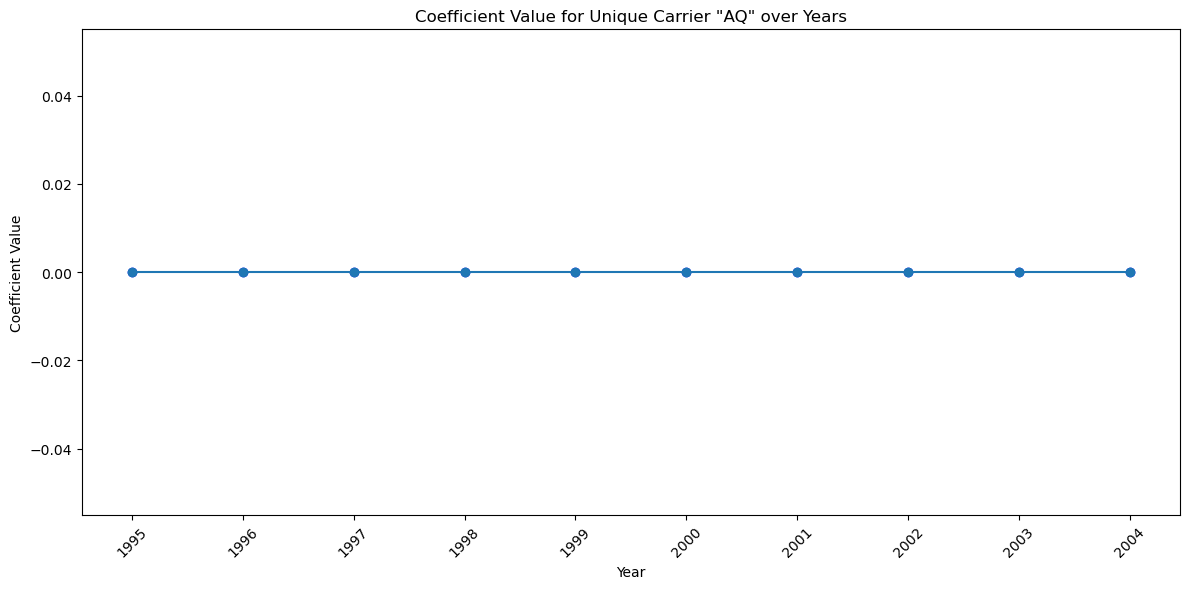

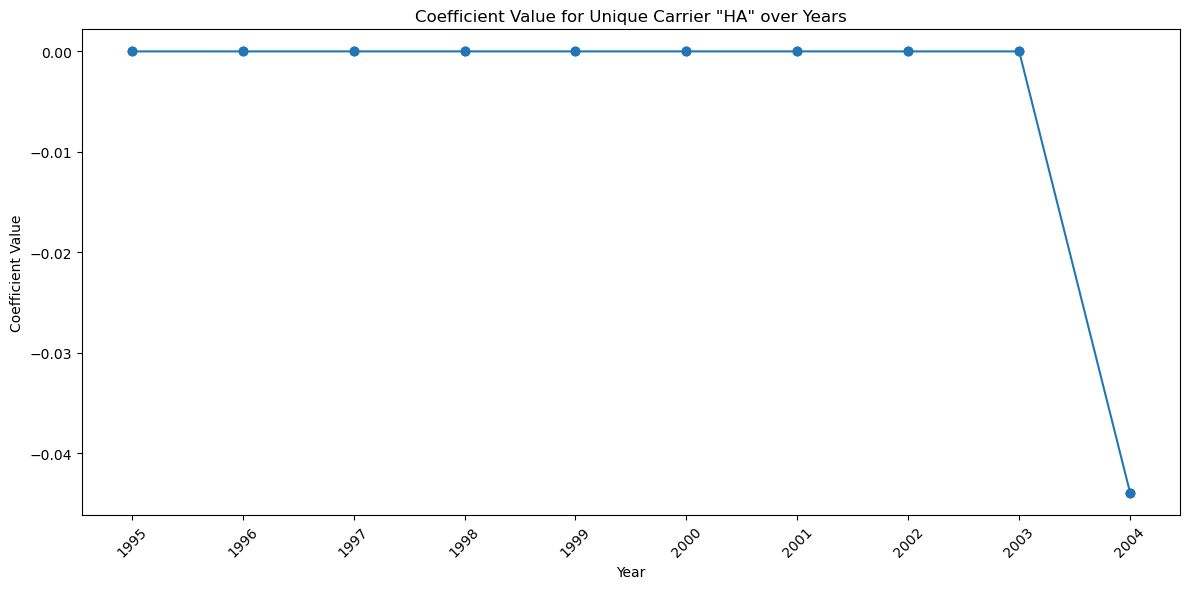

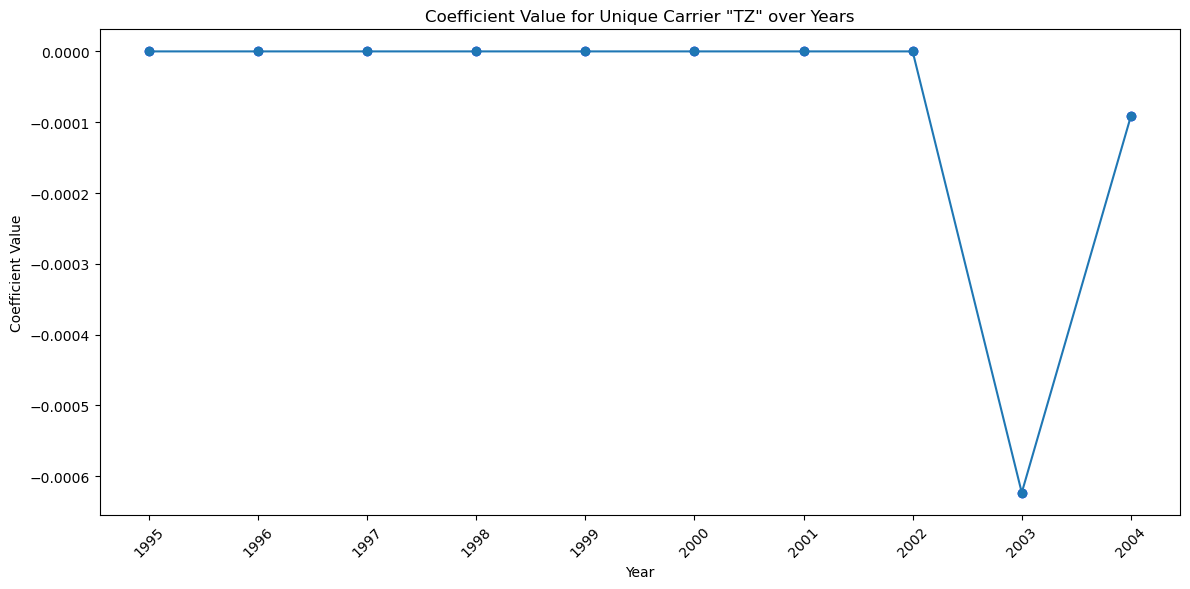

In [20]:
uniquecarriers = X_train['UniqueCarrier'].unique()

for carrier in uniquecarriers:
    plt.figure(figsize=(12, 6))
    plt.xlabel('Year')
    plt.ylabel('Coefficient Value')
    plt.title(f'Coefficient Value for Unique Carrier "{carrier}" over Years')

    coef_values = []

    for year in years:
        X_train_year = X_train[(X_train['Year'] == year) & (X_train['UniqueCarrier'] == carrier)]
        y_train_year = y_train.loc[X_train_year.index]

        if not X_train_year.empty and y_train_year.nunique() > 1:
            clf.fit(X_train_year, y_train_year)
            
            carrier_feature = [col for col in clf.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out() if carrier in col][0]
            carrier_index = list(clf.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out()).index(carrier_feature)
            
            coef_value = clf.named_steps['classifier'].coef_[0][carrier_index]
            coef_values.append(coef_value)
        else:
            coef_values.append(0)

    plt.plot(list(years), coef_values, marker='o', linestyle='-')
    plt.scatter(list(years), coef_values, marker='o', color='blue') 
    plt.xticks(list(years), rotation=45)
    plt.tight_layout()
    plt.show()


C:\Users\ASUS UX534F\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


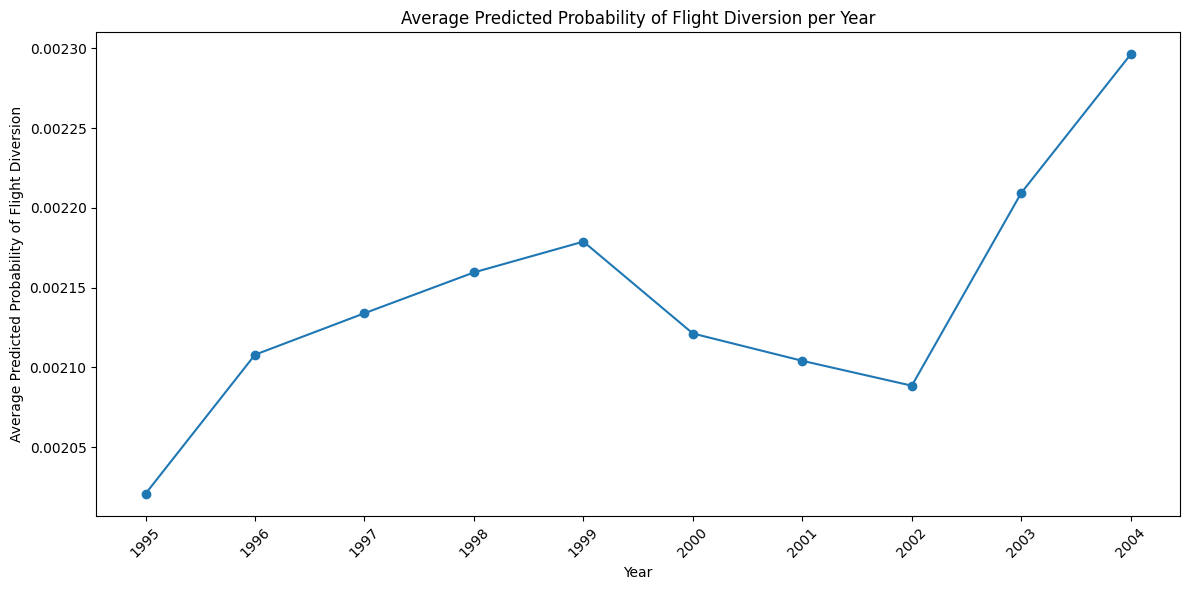

The year with the highest average predicted probability of flight diversion is 2004 with an average probability of 0.0023.


In [15]:
clf.fit(X_train, y_train)

probabilities = clf.predict_proba(X_test)[:, 1]
X_test_with_probs = X_test.copy()
X_test_with_probs['Predicted_Probability'] = probabilities

avg_probs_by_year = X_test_with_probs.groupby('Year')['Predicted_Probability'].mean()

plt.figure(figsize=(12, 6))
plt.plot(avg_probs_by_year.index, avg_probs_by_year.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Average Predicted Probability of Flight Diversion')
plt.title('Average Predicted Probability of Flight Diversion per Year')
plt.xticks(avg_probs_by_year.index, rotation=45)
plt.tight_layout()
plt.show()

highest_prob_year = avg_probs_by_year.idxmax()
highest_avg_prob = avg_probs_by_year.max()
print(f'The year with the highest average predicted probability of flight diversion is {highest_prob_year} with an average probability of {highest_avg_prob:.4f}.')


C:\Users\ASUS UX534F\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


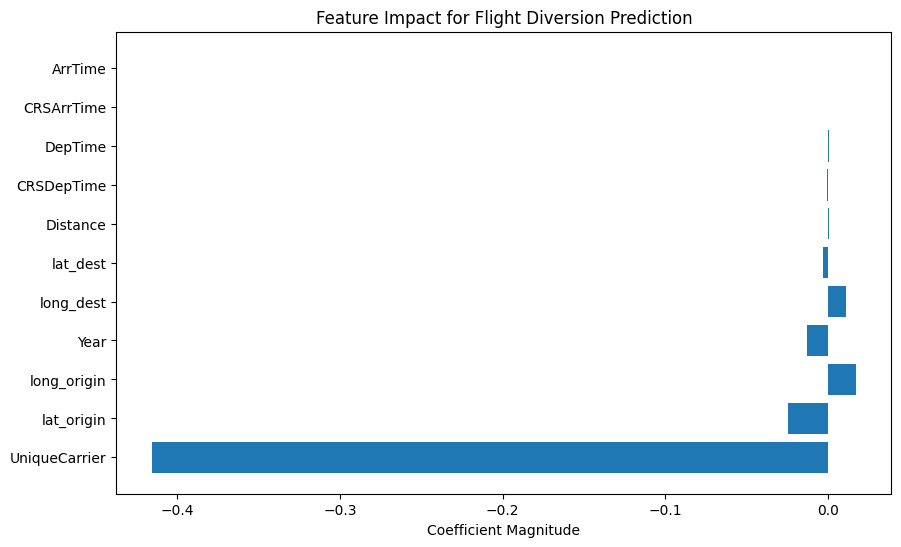

Feature coefficients:
UniqueCarrier: -0.41592616010853733
lat_origin: -0.02472788594958321
long_origin: 0.01732631721702439
Year: -0.012916715774805342
long_dest: 0.011310413610952624
lat_dest: -0.003262644191880429
Distance: 0.0006178011191978469
CRSDepTime: -0.00047556415542441486
DepTime: 0.00044985926237693137
CRSArrTime: -8.565315048043337e-05
ArrTime: 5.088578261431095e-05


In [14]:
clf.fit(X_train, y_train)

coefficients = clf.named_steps['classifier'].coef_[0]

feature_coefficients = dict(zip(features, coefficients))
sorted_feature_coefficients = sorted(feature_coefficients.items(), key=lambda x: abs(x[1]), reverse=True)

plt.figure(figsize=(10, 6))
plt.barh([x[0] for x in sorted_feature_coefficients], [x[1] for x in sorted_feature_coefficients])
plt.xlabel('Coefficient Magnitude')
plt.title('Feature Impact for Flight Diversion Prediction')
plt.show()

print("Feature coefficients:")
for feature, coefficient in sorted_feature_coefficients:
    print(f"{feature}: {coefficient}")